In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/googleb/train.csv',index_col=0)
test_data  = pd.read_csv('/content/drive/MyDrive/googleb/test.csv', index_col=0)

Data Analysis

In [ ]:
train_data

,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...
6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035998,125749,50,10,2.571408,1.558978,1,3.798729


In [ ]:
train_data.nunique().to_frame()

,0
breath_id,75450
R,3
C,3
time_step,3767571
u_in,4020248
u_out,2
pressure,950


In [ ]:
test_data.nunique().to_frame()

,0
breath_id,50300
R,3
C,3
time_step,2855528
u_in,2787790
u_out,2


getting total timestamp for breath id

In [ ]:
train_data.groupby("breath_id")["time_step"].count().unique()

array([80])

In [ ]:
test_data.groupby("breath_id")["time_step"].count().unique().item()   

80

In [ ]:
#longest breath
train_data.time_step.max()

2.9372379779815674

In [ ]:
#maximum time that the exploratory solenoid valve is set to 0
train_data.query('u_out == 0').time_step.max()

0.999798059463501

In [ ]:
#data against one breath id
breath_one = train_data.query('breath_id == 1').reset_index(drop = True)
breath_one
breath_one.nunique().to_frame()

,0
breath_id,1
R,1
C,1
time_step,80
u_in,66
u_out,2
pressure,55


In [ ]:
#visualising breath in & out against timestamp

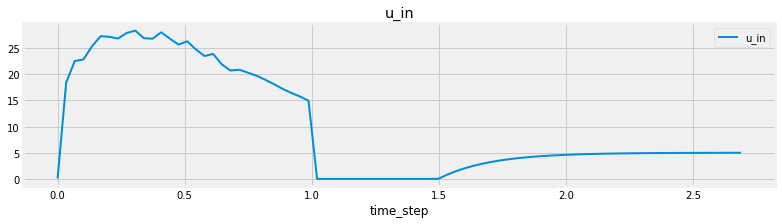

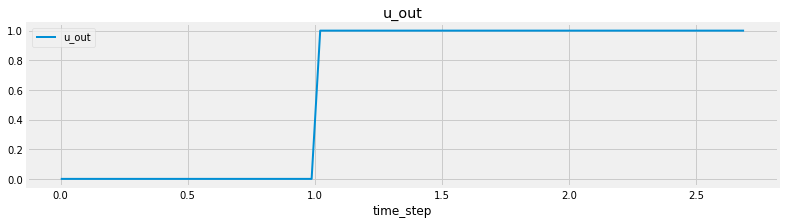

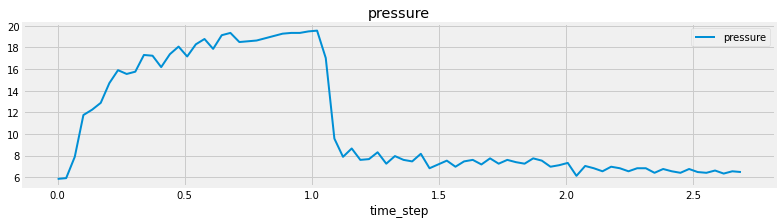

In [ ]:
breath_one.plot(x="time_step", y="u_in", kind='line',figsize=(12,3), lw=2, title="u_in");
breath_one.plot(x="time_step", y="u_out", kind='line',figsize=(12,3), lw=2, title="u_out");
breath_one.plot(x="time_step", y="pressure", kind='line',figsize=(12,3), lw=2, title="pressure");

In [ ]:
#value of R showing How restricted out breath is
train_data.R.value_counts().to_frame()

,R
50,2410080
5,1988800
20,1637120


In [ ]:
train_data.C.value_counts().to_frame()

,C
10,2244720
50,1971680
20,1819600


Thus total unique value in R is 3 & total unique value in C is 3 thus giving total 3*3 9 combinations in which they can affect the out[ut pressure]

In [ ]:
pd.crosstab(train_data["R"],train_data["C"]) /80

C,10,20,50
R,,,
5,8312.0,8277.0,8271.0
20,6070.0,6208.0,8186.0
50,13677.0,8260.0,8189.0


In [ ]:
pd.crosstab(test_data["R"],test_data["C"]) /80

C,10,20,50
R,,,
5,5437.0,5451.0,5447.0
20,4292.0,4088.0,5500.0
50,9081.0,5503.0,5501.0


In [ ]:
train_data.u_out.value_counts().to_frame()

,u_out
1,3745032
0,2290968


In [ ]:
max_p =round(train_data.pressure.max())
(max_p)

65

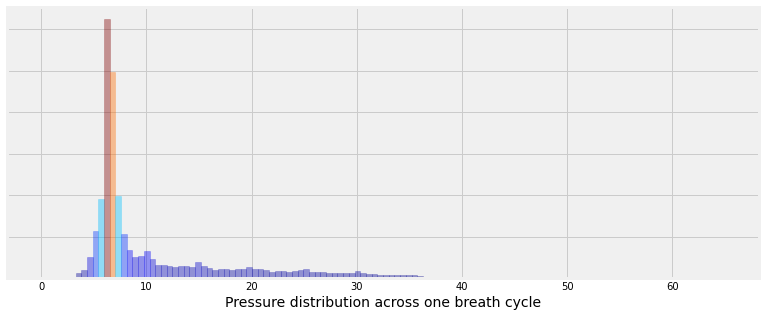

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.distplot(train_data['pressure'], 
             bins=120, 
             kde_kws={"clip":(0,max_p)}, 
             hist_kws={"range":(0,max_p)},
             color='Black', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Pressure distribution across one breath cycle", size=14)
ax.set(yticklabels=[])
plt.show();

In [ ]:
train_data.pressure.median()

7.032628177739799

In [ ]:
#since in this competition we are only interested in maintaining inhaling part of the pressure & not the exhale part we will only consider data where u_out is 0

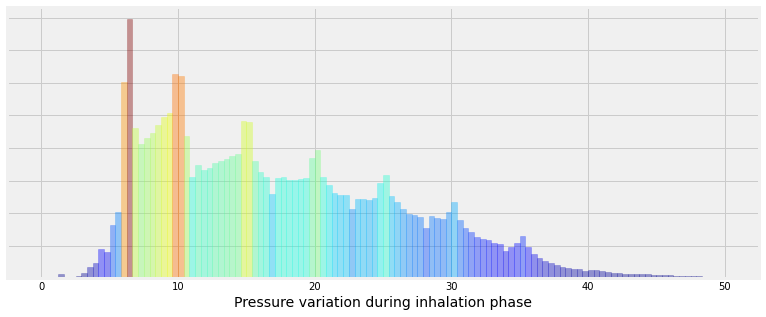

In [ ]:
u_out_is_zero = train_data.query("u_out == 0").reset_index(drop = True)
u_out_is_zero = train_data.loc[train_data["u_out"] == 0]
plt.figure(figsize = (12,5))
ax = sns.distplot(u_out_is_zero['pressure'], 
             bins=120, 
             kde_kws={"clip":(0,50)}, 
             hist_kws={"range":(0,50)},
             color='darkcyan', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Pressure variation during inhalation phase", size=14)
ax.set(yticklabels=[])
plt.show();

In [ ]:
u_out_is_zero.pressure.median()

15.820396359141819

In [ ]:
train_data.loc[(train_data["R"] == 5) & (train_data["C"] == 10)]

,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
2561,39,5,10,0.000000,33.092845,0,6.189002
2562,39,5,10,0.033633,100.000000,0,7.665347
2563,39,5,10,0.067378,82.875875,0,14.554958
2564,39,5,10,0.101031,63.513762,0,19.476108
2565,39,5,10,0.134777,55.044110,0,21.655474
...,...,...,...,...,...,...,...
6035116,125733,5,10,2.409022,4.951210,1,5.978096
6035117,125733,5,10,2.441762,4.958578,1,6.118700
6035118,125733,5,10,2.473706,4.964692,1,6.189002


In [ ]:
breath_2 = train_data.query('breath_id == 2').reset_index(drop = True)
breath_3 = train_data.query('breath_id == 3').reset_index(drop = True)
breath_4 = train_data.query('breath_id == 4').reset_index(drop = True)
breath_5 = train_data.query('breath_id == 5').reset_index(drop = True)
breath_17 = train_data.query('breath_id == 17').reset_index(drop = True)
breath_18 = train_data.query('breath_id == 18').reset_index(drop = True)
breath_21 = train_data.query('breath_id == 21').reset_index(drop = True)
breath_39 = train_data.query('breath_id == 39').reset_index(drop = True)

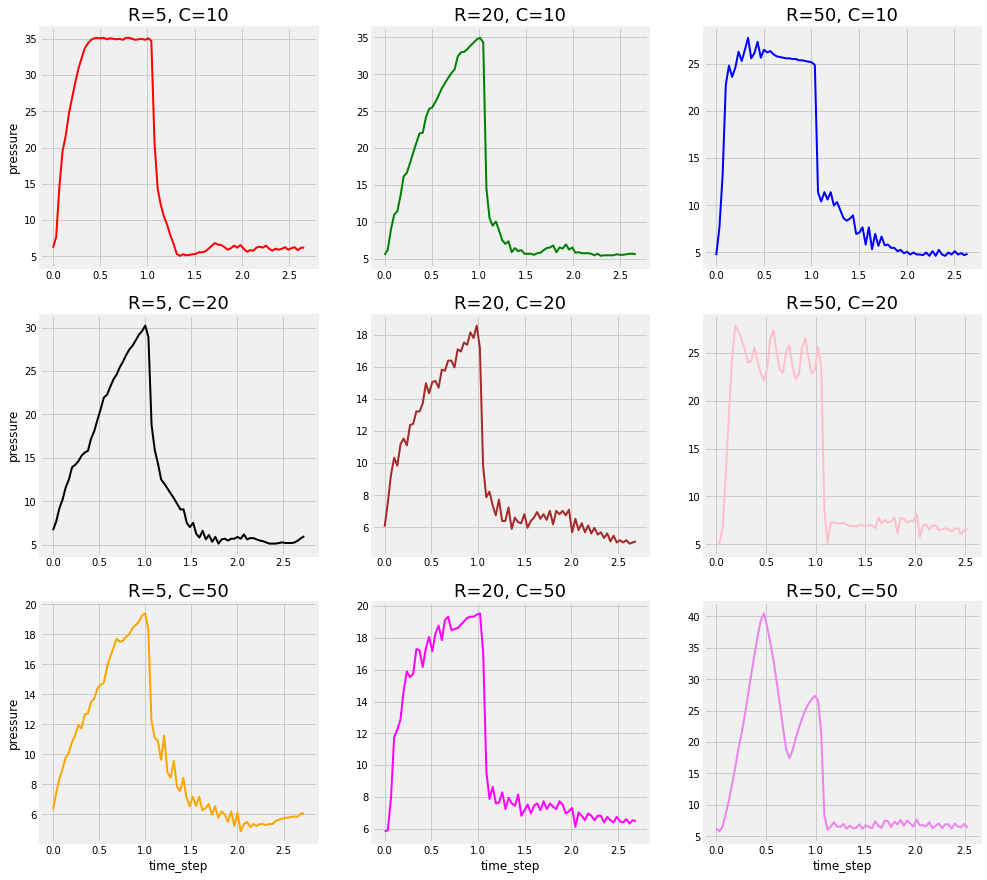

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15,15))
sns.lineplot(data=breath_39, x="time_step", y="pressure", color = "red",lw=2, ax=axes[0,0])
axes[0,0].set_title ("R=5, C=10", fontsize=18)
axes[0,0].set(xlabel='')
#axes[0,0].set(ylim=(0, None))
sns.lineplot(data=breath_21, x="time_step", y="pressure",color = "green",  lw=2, ax=axes[0,1])
axes[0,1].set_title ("R=20, C=10", fontsize=18)
axes[0,1].set(xlabel='')
axes[0,1].set(ylabel='')
#axes[0,1].set(ylim=(0, None))
sns.lineplot(data=breath_18, x="time_step", y="pressure",color = "blue",  lw=2,ax=axes[0,2])
axes[0,2].set_title ("R=50, C=10", fontsize=18)
axes[0,2].set(xlabel='')
axes[0,2].set(ylabel='')
#axes[0,2].set(ylim=(0, None))
sns.lineplot(data=breath_17, x="time_step", y="pressure",color = "black",  lw=2,ax=axes[1,0])
axes[1,0].set_title ("R=5, C=20", fontsize=18)
axes[1,0].set(xlabel='')
#axes[1,0].set(ylim=(0, None))
sns.lineplot(data=breath_2, x="time_step", y="pressure",color = "brown",  lw=2,ax=axes[1,1])
axes[1,1].set_title ("R=20, C=20", fontsize=18)
axes[1,1].set(xlabel='')
axes[1,1].set(ylabel='')
#axes[1,1].set(ylim=(0, None))
sns.lineplot(data=breath_3, x="time_step", y="pressure",color = "pink",  lw=2,ax=axes[1,2])
axes[1,2].set_title ("R=50, C=20", fontsize=18)
axes[1,2].set(xlabel='')
axes[1,2].set(ylabel='')
#axes[1,2].set(ylim=(0, None))
sns.lineplot(data=breath_5, x="time_step", y="pressure",color = "orange",  lw=2,ax=axes[2,0])
axes[2,0].set_title ("R=5, C=50", fontsize=18)
#axes[2,0].set(ylim=(0, None))
sns.lineplot(data=breath_one, x="time_step", y="pressure",color = "magenta",  lw=2,ax=axes[2,1])
axes[2,1].set_title ("R=20, C=50", fontsize=18)
axes[2,1].set(ylabel='')
#axes[2,1].set(ylim=(0, None))
sns.lineplot(data=breath_4, x="time_step", y="pressure",color = "violet",  lw=2,ax=axes[2,2])
axes[2,2].set_title ("R=50, C=50", fontsize=18)
axes[2,2].set(ylabel='')
#axes[2,2].set(ylim=(0, None))

plt.show();

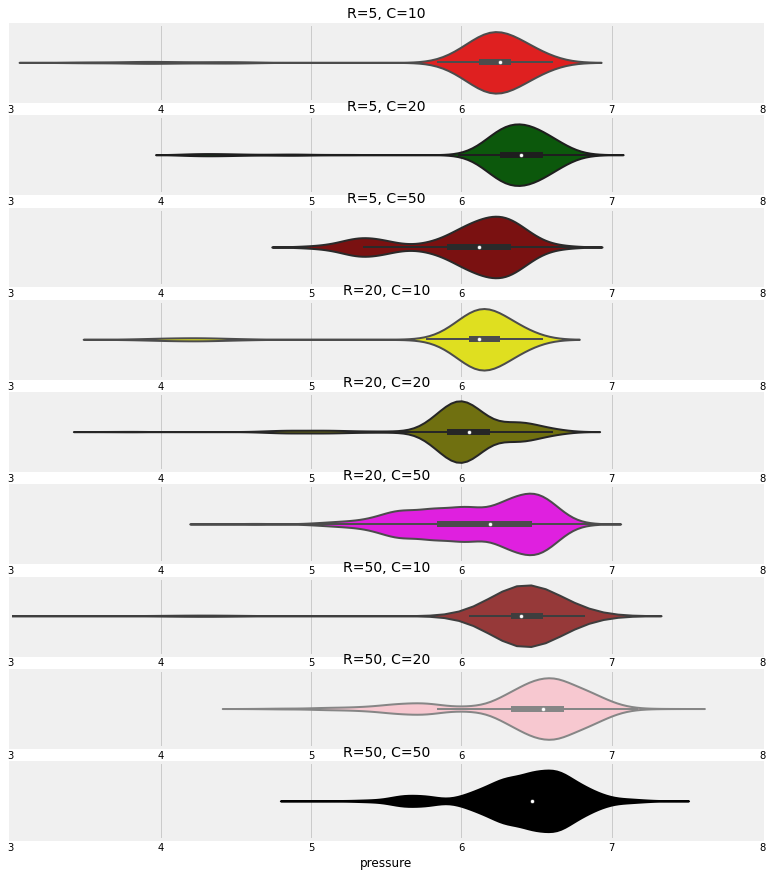

In [ ]:
zero_time = train_data.query("time_step < 0.000001 & u_in < 0.000001").reset_index(drop = True)
zero_time_5_10  = zero_time.query("R ==  5 & C == 10").reset_index(drop = True)
zero_time_5_20  = zero_time.query("R ==  5 & C == 20").reset_index(drop = True)
zero_time_5_50  = zero_time.query("R ==  5 & C == 50").reset_index(drop = True)
zero_time_20_10 = zero_time.query("R == 20 & C == 10").reset_index(drop = True)
zero_time_20_20 = zero_time.query("R == 20 & C == 20").reset_index(drop = True)
zero_time_20_50 = zero_time.query("R == 20 & C == 50").reset_index(drop = True)
zero_time_50_10 = zero_time.query("R == 50 & C == 10").reset_index(drop = True)
zero_time_50_20 = zero_time.query("R == 50 & C == 20").reset_index(drop = True)
zero_time_50_50 = zero_time.query("R == 50 & C == 50").reset_index(drop = True)

fig, axes = plt.subplots(9,1,figsize=(12,15))
sns.violinplot(x=zero_time_5_10["pressure"], linewidth=2, ax=axes[0], color="red")
axes[0].set_title ("R=5, C=10", fontsize=14)
axes[0].set(xlim=(3, 8))
sns.violinplot(x=zero_time_5_20["pressure"], linewidth=2, ax=axes[1], color="darkgreen")
axes[1].set_title ("R=5, C=20", fontsize=14)
axes[1].set(xlim=(3, 8))
sns.violinplot(x=zero_time_5_50["pressure"], linewidth=2, ax=axes[2], color="darkred" )
axes[2].set_title ("R=5, C=50", fontsize=14)
axes[2].set(xlim=(3, 8))
sns.violinplot(x=zero_time_20_10["pressure"], linewidth=2, ax=axes[3], color="yellow")
axes[3].set_title ("R=20, C=10", fontsize=14)
axes[3].set(xlim=(3, 8))
sns.violinplot(x=zero_time_20_20["pressure"], linewidth=2, ax=axes[4], color="olive")
axes[4].set_title ("R=20, C=20", fontsize=14)
axes[4].set(xlim=(3, 8))
sns.violinplot(x=zero_time_20_50["pressure"], linewidth=2, ax=axes[5], color="magenta" )
axes[5].set_title ("R=20, C=50", fontsize=14)
axes[5].set(xlim=(3, 8))
sns.violinplot(x=zero_time_50_10["pressure"], linewidth=2, ax=axes[6], color="brown")
axes[6].set_title ("R=50, C=10", fontsize=14)
axes[6].set(xlim=(3, 8))
sns.violinplot(x=zero_time_50_20["pressure"], linewidth=2, ax=axes[7], color="pink")
axes[7].set_title ("R=50, C=20", fontsize=14)
axes[7].set(xlim=(3, 8))
sns.violinplot(x=zero_time_50_50["pressure"], linewidth=2, ax=axes[8], color="black" )
axes[8].set_title ("R=50, C=50", fontsize=14)
axes[8].set(xlim=(3, 8));